# **Welcome to ABDICO_parsing Code Notebook**

It is often useful to extract the main entities and actions described in a document. For example, this is useful in the Institutional Grammar (IG) for identifying some of the most common parts of an institutional statement, like the Attribute and Object, along with their Aim and Deontic.

This notebook uses new methods to automate this extraction process, giving policy scholars an easy route to some of the most common IG elements (though it's not restricted to IG, and is useful for extracting (and relating) these syntactic/semantic elements in any kind of text).

### ***This notebook performs the following tasks***


*   It takes a corpus of policy sentences from any domain and extracts four central components if the institutional grammar from each: Attribute, Aim, Deontic, and Object
  *   By default, it performs these tasks on a dataset we provide, but the intent is that users will upload their own datasets.
*   When given unlabeled data, it applies labels
*   When given labeled (such as hand-coded) data, it applies labels and compares the accuracy of its labels to those provided.
*   It outputs a downloadable file of the original statements with labels, as well as statistics and figures that can be used in reporting.



### This notebook follows an approach to automatic coding with several features

Our approach is distinct from other manual and automatic approach to IG coding:
* *No model training/manual annotations*. You don't have to do any labelling. Labels may still be useful if you want a sense of the accuracy of our approach for your method, but such validation requires the coding of only a handful examples.

* *Supports users of any experience level*. To benefit from our approach, you only need to get your data into the right format (see example datasets below), upload it, run the notebook, and download the outputs.

* "Documentation* We strive to provide comprehensive instructions. We welcome researchers with development experience to fork the repo, adapt and continue our work by submitting a PR! **However, programming/technical experience isn't a prerequisite to using the library.**  

* *It uses both syntactic and semantic information*. This is important because not any grammatical subject of a sentence (a syntactic property) can be an Attribute, that subject has to be some kind of agent capable of action and decision making (semantic property)
* *It is naturally robust to passive voice*. Passive voice increases the complexity of manual annotation as well as computational coding.  Our approach works around this issue to naturally identify Attributes and Objects even when they are grammatical objects and subjects, respectively. Especially useful for understanding actors, object and aims in practical rules or other forms of informal text.
* *It gets better as AI gets better*. We shall continue maintenance and update backend ML models over time.
* *Limited implementation*. We currently support only the four most promiment constitutents of the IG framework. Attributes, aims, objects and deontics alone provide considerable information about governance structures.

  The notebook does not extract context, which is defined slightly differently for semantic role labeling, a linguistic framework we use here. However, we intend to extend the library to extract contextual information, such as conditions and constraints over the next few months.
  
  The later part of the notebook provides evaluation tests of generated IG annotations and ground truth human annotations across 23 published ABDICO datasets.   



# **Boilerplate code**
This code sets up the analysis. You don't have to understand it. Just run it and then scroll down.

Run these commands below for necessary installations. To run press ***ctrl+enter*** keys.

In [1]:
!git clone https://github.com/BSAkash/IG-SRL
%cd IG-SRL
!git checkout Akash
!pip install -r ./SRL/requirements.txt
!python -m spacy download en_core_web_sm
from SRL import SRL
%cd /content/

Cloning into 'IG-SRL'...
remote: Enumerating objects: 389, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 389 (delta 88), reused 97 (delta 44), pack-reused 245
Receiving objects: 100% (389/389), 2.43 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (205/205), done.
/content/IG-SRL
Branch 'Akash' set up to track remote branch 'Akash' from 'origin'.
Switched to a new branch 'Akash'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Output()

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/content


# **Data upload**
Upload your dataset file here. Or, to see it run on an example dataset, download the provided example datafile [FPC_Siddiki.xlsx - Camden Food Security.csv](https://github.com/BSAkash/IG-SRL/blob/Akash/SRL/data/FPC_Siddiki.xlsx%20-%20Camden%20Food%20Security.csv) (from Siddiki et al., 2019), to see example outputs and to become familiar with the flow.

For your own data, you will likely have to adapt it for this notebook to run. See below for the sample format

Please name uploaded file as `main.csv` in a `.csv` file format and Policy document column should be named `raw institutional statement`

In [2]:
##allow user to upload files : Upload file should be named main.csv. Policy statement column should be named "raw institutional statement"
from google.colab import files
uploaded = files.upload()

This is our ASF policy dataset for demonstration purpose and you do not need to run this if you have uploaded your own file in the above cell. If you still want to run this please make sure to uncomment the code in the below cell using the (ctrl+/) keys

In [7]:
# !wget -O main.csv https://storage.googleapis.com/routines_semantic/asf-policies.csv
# data = SRL.pd.read_csv('main.csv')
# data['raw institutional statement'] = data['raw institutional statement'].apply(lambda x : SRL.nltk.tokenize.sent_tokenize(x))
# data = data.explode('raw institutional statement')
# data.to_csv('main.csv',index=False)

--2023-10-19 02:19:42--  https://storage.googleapis.com/routines_semantic/asf-policies.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 209.85.234.207, 173.194.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37107 (36K) [text/csv]
Saving to: ‘main.csv’

main.csv            100%[===================>]  36.24K  --.-KB/s    in 0.001s  

2023-10-19 02:19:42 (54.3 MB/s) - ‘main.csv’ saved [37107/37107]




# Applying labels

*  Run this cell to get ABDICO constiuents on "main.csv" List item
* The `.inference()` function below processes your uploaded dataset to add labels based on the text column.


In [4]:
instance = SRL.SRL(agent="strict")
instance.inference('main.csv')

main.csv


# **Download labeled data**
* Download to write the data to a file and retreive labeled data in that file.

* Download is in `.csv` format and can be opened in any spreadsheet software.

* Outputs can be found under "Attribute inf, Object inf, Deontic inf, Aim inf"

In [5]:
files.download('main.csv')# Download the file and view the results here!!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Extra: Validation**


* The cell below runs on 24 different ABDICO datasets (under /content/NLP4Commons/SRL/data) and evaluates the accuracy of this method on inferring IG constituents from different policies.

* The statistic we use for comparing predictions to ground labels is a standard F1 measure for text data. Generally, a value of 0.7 or more indicates strong performance. Read more about text F1 score [here](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6)

 * If you have an existing policy dataset with ABDICO labels (manually annotated), this following code will also help validate our generted labels to your pre-existing labels. Make sure that the originally uploaded file has the following [format](https://github.com/BSAkash/IG-SRL/blob/Akash/SRL/data/FPC_Siddiki.xlsx%20-%20Connecticut%20Food%20Policy.csv). In the left hand navigation panel, place your file under /content/NLP4Commons/SRL/data and run the cell below.



* The box plots below illustrate the range of F1 scores for each type of IG constituent.
* Any contributions to the dataset can be viewed in the evaluation results below which includes several datasets along with yours!!

/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - Denver Sustainable FPC.csv
 F1 score for attribute: 0.7083333333333333
 F1 score for object: 0.8333333333333334
 F1 score for deontic: 1.0
 F1 score for aim: 0.7777777777777777
/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - New York Council on Food .csv
 F1 score for attribute: 0.8020202020202021
 F1 score for object: 0.6427193341667026
 F1 score for deontic: 0.9259259259259258
 F1 score for aim: 0.8333333333333333
/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - New Haven FPC.csv
 F1 score for attribute: 0.4795918367346939
 F1 score for object: 0.4989898710961329
 F1 score for deontic: 0.8125
 F1 score for aim: 0.65625
/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - Michigan FPC.csv
 F1 score for attribute: 0.8015873015873016
 F1 score for object: 0.6132184253900309
 F1 score for deontic: 0.935897435897436
 F1 score for aim: 0.8171717171717171
/content/IG-SRL/SRL/data/ColoradoAquacultureRegulations_Siddiki.xlsx - Fish Health Board.csv
 F1 score for attr

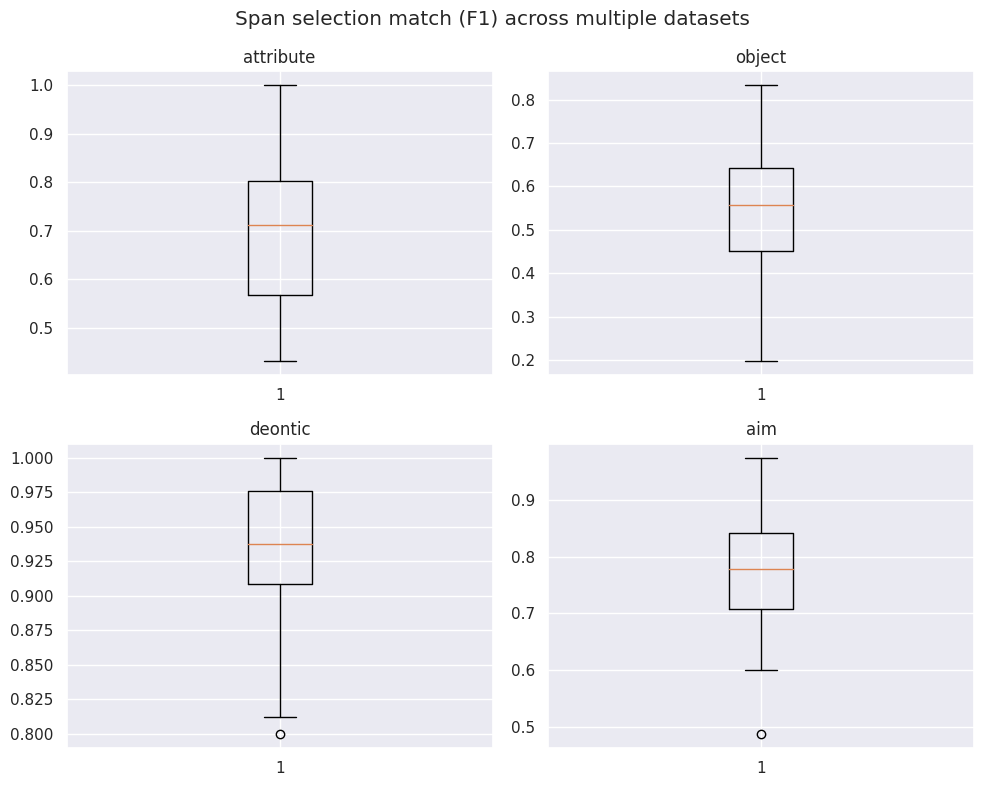

In [6]:
evaluation = SRL.SRL()
plt = evaluation.srl_eval()
plt.tight_layout()
plt.show()